In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

#### Load the dataset

In [2]:
df = pd.read_csv('Position_Salaries.csv')
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


#### Split the Data

In [4]:
x = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values

In [5]:
x,y

(array([[ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]], dtype=int64),
 array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
         300000,  500000, 1000000], dtype=int64))

In [7]:
y = y.reshape(len(y),1)
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

#### Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)

In [9]:
x,y

(array([[-1.5666989 ],
        [-1.21854359],
        [-0.87038828],
        [-0.52223297],
        [-0.17407766],
        [ 0.17407766],
        [ 0.52223297],
        [ 0.87038828],
        [ 1.21854359],
        [ 1.5666989 ]]),
 array([[-0.72004253],
        [-0.70243757],
        [-0.66722767],
        [-0.59680786],
        [-0.49117815],
        [-0.35033854],
        [-0.17428902],
        [ 0.17781001],
        [ 0.88200808],
        [ 2.64250325]]))

#### Training SVR model on whole Dataset

In [10]:
from sklearn.svm import SVR

reg = SVR(kernel='rbf')
reg.fit(x,y)

C:\Users\HP\anaconda3\envs\py3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

#### Predict the Result

In [17]:
sc_y.inverse_transform(reg.predict(sc_x.fit_transform([[6.5]])).reshape(-1,1))

array([[131106.77303274]])

#### Visualize SVR results

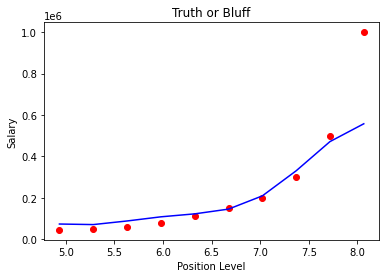

In [20]:
plt.scatter(sc_x.inverse_transform(x),sc_y.inverse_transform(y),color='red')
plt.plot(sc_x.inverse_transform(x),sc_y.inverse_transform(reg.predict(x).reshape(-1,1)),color='blue')
plt.title('Truth or Bluff')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

#### High Resolution smooth Curve

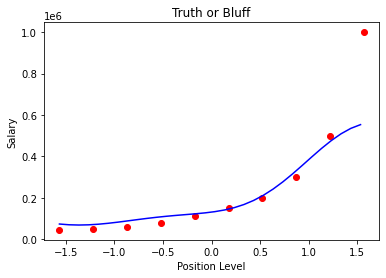

In [25]:
x_grid = np.arange(min(sc_x.fit_transform(x)),max(sc_x.fit_transform(x)),0.1)
x_grid = x_grid.reshape(len(x_grid),1)
plt.scatter(sc_x.inverse_transform(x),sc_y.inverse_transform(y),color='red')
plt.plot(x_grid,sc_y.inverse_transform(reg.predict(sc_x.transform(x_grid)).reshape(-1,1)),color='blue')
plt.title('Truth or Bluff')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()